In [1]:
%load_ext autoreload
%autoreload 2

import logging
import os
import sys

l = logging.getLogger()
lh = logging.StreamHandler(sys.stdout)
l.addHandler(lh)
l.setLevel(logging.INFO)

import torch

import experiment
import cpn

# Vanilla case
#cfg = experiment.experiment.get_config(recover_after_lesion=False, coadapt=False, cuda="3")

# Co-adaptation case
cfg = experiment.experiment.get_config(recover_after_lesion=True, coadapt=True, cuda="0")

# Co-adaptation with an AIP lesion
#cfg = experiment.experiment.get_aip_lesion_config(cuda="3", coadapt=False)

# M1 lesion case
#cfg = experiment.experiment.get_m1_lesion_config(cuda="3")


LOG_DIR = "/home/mbryan/coproc-poc/models"
my_coproc = cpn.CPN_EN_CoProc(cfg, log_dir=LOG_DIR, recycle_thresh=1)

In [2]:
my_experiment = experiment.experiment.stage(my_coproc, cfg)

In [ ]:
# Start running experiment; this and the next cell can be killed with
#  ctrl+c, and resumed with the cell below.

loss_history = my_experiment.run()

In [ ]:
# Show me how I did, make pretty graphs, etc.
# TODO: this.
#experiment.score(my_experiment.loss_history)

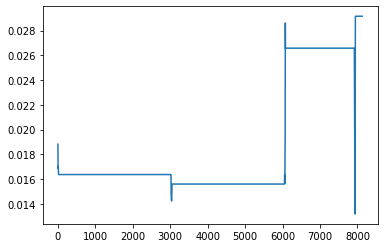

0.01318556722253561
0.3738261621211588


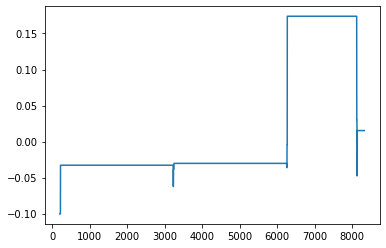

In [4]:
# TODO: experiment.score should be producing these
import matplotlib.pyplot as plt

lh = my_experiment.loss_history

task_losses = [r.task_loss for r in lh._recs if r.task_loss is not None]
plt.plot(task_losses)
plt.show()
print(min(task_losses))
print(lh.max_pct_recov)

class_sep = [r.class_separation for r in lh._recs if r.class_separation is not None]
plt.plot(class_sep)
plt.show()


In [31]:

my_experiment.loss_history.records[-1]

LossRec(eidx=444601, task_loss=0.004459013696759939, task_val_loss=0.004254971165210009, pct_recov=0.8107209378624599, class_separation=-0.04687654566723043, user_data=CPNENStats(msg='en', epoch_type=<EpochType.EN: 0>, train_loss=0.004344584420323372, train_val_loss=0.004176819231361151, pred_loss=0.005402317736297846, pred_val_loss=0.002889303956180811))